# Principal Component Analysis in Villes Dataset

### Description: 
This code example tries to emulate the example of "Aprender de los Datos, El Análisis de Componentes Principales, una aproximación desde el Data Mining" book of "Tomas Aluja" and "Alain Morineau"

## Project: 
[r-examples](https://github.com/garciparedes/r-examples)

## Author: 
[Sergio García Prado](garciparedes.me)

### Date: 
2017-12

In [1]:
rm(list = ls())

In [2]:
column.index <- function(data, columns.name) {
  match(columns.name, colnames(data))
}

In [3]:
filter.by.factor <- function(data, columns.name, factor, columns.remove = TRUE) {
  col.index <- column.index(data, columns.name)
  indexer <- is.element(villes[, col.index], factor)
  if (columns.remove) {
    return(data[indexer, - col.index])
  } else {
    return(data[indexer, ])
  }
}

In [4]:
filter.by.columns <- function(data, columns.name, reverse = FALSE) {
  col.index <- column.index(data, columns.name)
  if (reverse){
    col.index <- - col.index
  }
  return(data[, col.index])
}

In [5]:
filter.complete <- function(data) {
  data[complete.cases(data),]
}

In [6]:
villes <- read.csv("./../datasets/villes.csv")
summary(villes)  

         Ciudad              Año                 Región.del.mundo
 AbuDhabi91 :  1   Edition 1991:53   CENTRAL EUROPE      :18     
 AbuDhabi94 :  1   edition 1994:53   NORD AMERIQUE       :14     
 Amsterdam91:  1                     NORD EUROPE         :12     
 Amsterdam94:  1                     SUD AMERIQUE        :12     
 Athenes91  :  1                     SUD ASIE ET AUSTRALI:12     
 Athenes94  :  1                     EST ASIE            :10     
 (Other)    :100                     (Other)             :28     
 Indice.precios.sin.alquiler Indice.precio.con.alquiler Indice.salarios.bruto
 Min.   : 30.3               Min.   : 30.20             Min.   :  2.10       
 1st Qu.: 52.8               1st Qu.: 55.90             1st Qu.: 14.40       
 Median : 67.5               Median : 71.30             Median : 43.00       
 Mean   : 68.1               Mean   : 71.76             Mean   : 41.83       
 3rd Qu.: 80.4               3rd Qu.: 85.60             3rd Qu.: 65.40       
 Max

In [7]:
head(villes)

Ciudad,Año,Región.del.mundo,Indice.precios.sin.alquiler,Indice.precio.con.alquiler,Indice.salarios.bruto,Indice.salarios.neto,Horas.anuales.de.trabajo,Vacaciones.anuales.pagadas,Poder.compra.bruto,⋯,Mecánico.Med.1,Obrero.constr.Med.1,Tornero.Med.1,Jefe.de.cocina.Med.1,Diretor.fábrica.Med.1,Ingeniero.Med.1,Cajero.banco.Med.1,Secretaria.dirección.Med.1,Dependienta.Med.1,Trabajador.text.Med.1
AbuDhabi91,Edition 1991,PROCHE ORIENT,NA,NA,NA,NA,NA,NA,NA,⋯,,,,,,,,,,
AbuDhabi94,edition 1994,PROCHE ORIENT,71.3,78.1,29.9,38.0,2100,28.9,42.0,⋯,0.5770 0.68,0.1330 0.26,0.1312 0.75,2.2949 2.48,6.5651 9.13,3.9393 4.37,3.2258 3.50,1.0769 1.11,1.0769 1.13,0.1312 0.36
Amsterdam91,Edition 1991,CENTRAL EUROPE,65.6,65.7,56.9,49.0,1714,31.9,86.7,⋯,0.8876 0.90,0.9425 0.96,1.0820 1.09,1.0602 1.07,1.9101 1.94,1.8450 1.88,1.0949 1.11,1.1070 1.12,0.8820 0.90,0.8074 0.83
Amsterdam94,edition 1994,CENTRAL EUROPE,68.8,70.3,61.4,53.7,1792,27.5,89.3,⋯,0.8655 0.87,0.7819 0.79,1.3147 1.34,0.8712 0.95,1.9935 2.04,1.9597 1.98,1.3495 1.36,1.0202 1.03,0.7619 0.77,0.8074 0.83
Athenes91,Edition 1991,SUD EUROPE,53.8,55.6,30.2,30.4,1792,23.5,56.1,⋯,0.9784 1.00,1.1152 1.13,1.6435 1.88,1.5613 1.69,1.5623 1.58,1.6746 1.72,1.1088 1.14,0.7567 0.83,0.5198 0.54,0.6574 0.66
Athenes94,edition 1994,SUD EUROPE,54.4,56.7,27.7,28.5,1775,24.5,50.9,⋯,0.6898 0.75,1.1152 1.13,1.0959 1.10,1.2568 1.27,1.4141 1.45,1.4946 1.54,1.2647 1.31,1.0202 1.03,0.6595 0.68,0.7037 0.71


In [8]:
cols <- c("Ciudad", "Región.del.mundo", "Maestro", "Chófer.de.autobús",
          "Mecánico.de.coche", "Obrero.de.la.construcción", "Tornero", 
          "Jefe.de.cocina", "Director.de.fábrica", "Ingeniero", "Cajero.banco",
          "Secretaria.de.dirección", "Dependienta", "Trabajador.textil")

villes.use <- filter.complete(filter.by.columns(filter.by.factor(
  villes, "Año", "edition 1994"), cols))

villes.use <- villes.use[- 1,]
villes.use[,-c(1,2)] <- villes.use[, -c(1, 2)] - rowMeans(villes.use[, -c(1, 2)])

head(villes.use)

,Ciudad,Región.del.mundo,Maestro,Chófer.de.autobús,Mecánico.de.coche,Obrero.de.la.construcción,Tornero,Jefe.de.cocina,Director.de.fábrica,Ingeniero,Cajero.banco,Secretaria.de.dirección,Dependienta,Trabajador.textil
4,Amsterdam94,CENTRAL EUROPE,3325.0000,4425.0000,-6175.0000,-7475.000,1525.0000,-4875.0000,13125.000,12125.0000,2025.00000,-3475.00000,-7775.0000,-6775.0000
6,Athenes94,SUD EUROPE,525.0000,1725.0000,-3575.0000,125.000,25.0000,1425.0000,2725.000,3425.0000,1425.00000,-675.00000,-3775.0000,-3375.0000
8,Bangkok94,SUD ASIE ET AUSTRALI,-3866.6667,-4566.6667,-5366.6667,-6266.667,-1366.6667,533.3333,19333.333,9933.3333,4833.33333,-866.66667,-6266.6667,-6066.6667
10,Bogota94,SUD AMERIQUE,-5041.6667,-5041.6667,-2641.6667,-7441.667,-3641.6667,2458.3333,22358.333,9858.3333,-741.66667,-41.66667,-6041.6667,-4041.6667
12,Bombay94,SUD ASIE ET AUSTRALI,-258.3333,-158.3333,-558.3333,-1058.333,-458.3333,841.6667,2441.667,241.6667,-58.33333,341.66667,-758.3333,-558.3333
14,Bruxelles94,CENTRAL EUROPE,-1308.3333,-2408.3333,-5108.3333,-4108.333,791.6667,1691.6667,12991.667,7291.6667,3291.66667,-2408.33333,-5208.3333,-5508.3333


In [9]:
print(dim(villes.use))

[1] 50 14


In [10]:
?princomp

princomp {stats},R Documentation
formula,"a formula with no response variable, referring only to numeric variables."
data,an optional data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector used to select rows (observations) of the data matrix x.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit."
x,a numeric matrix or data frame which provides the data for the principal components analysis.
cor,a logical value indicating whether the calculation should use the correlation matrix or the covariance matrix. (The correlation matrix can only be used if there are no constant variables.)
scores,a logical value indicating whether the score on each principal component should be calculated.
covmat,"a covariance matrix, or a covariance list as returned by cov.wt (and cov.mve or cov.mcd from package MASS). If supplied, this is used rather than the covariance matrix of x."
...,arguments passed to or from other methods. If x is a formula one might specify cor or scores.
object,"Object of class inheriting from ""princomp"""


In [11]:
villes.use.pca <- princomp(scale(filter.by.columns(
  villes.use, c("Ciudad", "Región.del.mundo"), reverse = TRUE)))

In [12]:
print(villes.use.pca)

Call:
princomp(x = scale(filter.by.columns(villes.use, c("Ciudad", 
    "Región.del.mundo"), reverse = TRUE)))

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
2.3273960 1.4760199 1.1039163 0.9916317 0.7726695 0.6388722 0.5392236 0.5009728 
   Comp.9   Comp.10   Comp.11   Comp.12 
0.4398279 0.3853391 0.2716289 0.0000000 

 12  variables and  50 observations.


## Variance Ratio by Component

In [13]:
(villes.use.pca$sdev ^ 2) / sum(villes.use.pca$sdev ^ 2)

Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
0.46060987 0.18525806 0.10362510 0.08361679 0.05076685 0.03470728 0.02472467 
    Comp.8     Comp.9    Comp.10    Comp.11    Comp.12 
0.02134130 0.01644971 0.01262638 0.00627400 0.00000000

### Proyection Weights

In [14]:
villes.use.pca$loadings


Loadings:
                          Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
Maestro                   -0.266 -0.345  0.337 -0.196        -0.335       
Chófer.de.autobús         -0.105 -0.455  0.439        -0.496  0.246       
Mecánico.de.coche          0.337 -0.197 -0.158 -0.254         0.468       
Obrero.de.la.construcción  0.350 -0.234                0.265  0.122  0.543
Tornero                    0.100 -0.519 -0.310  0.142  0.343        -0.630
Jefe.de.cocina             0.241  0.239 -0.370 -0.362 -0.578        -0.279
Director.de.fábrica       -0.366  0.151 -0.229 -0.136  0.158 -0.336  0.240
Ingeniero                 -0.222        -0.291  0.720 -0.275  0.280       
Cajero.banco              -0.242  0.369  0.312 -0.128  0.316  0.556 -0.295
Secretaria.de.dirección    0.306  0.248  0.333  0.286  0.114 -0.179 -0.220
Dependienta                0.375  0.185  0.180               -0.180 -0.101
Trabajador.textil          0.371         0.233  0.318        -0.136  0.116
              

## Absolute Contributions

In [15]:
villes.use.pca.ctr.abs <- t(t(villes.use.pca$scores) ^ 2 / (dim(villes.use)[1] * villes.use.pca$sdev ^ 2))
data.frame(villes.use[, "Ciudad"], round(villes.use.pca.ctr.abs, digits = 6))

,villes.use....Ciudad..,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
4,Amsterdam94,0.006238,0.021410,0.011673,0.016005,0.013654,0.002103,0.008564,0.048493,0.000005,0.002183,0.006862,Inf
6,Athenes94,0.010510,0.003719,0.018186,0.002218,0.003625,0.000131,0.000639,0.025381,0.031063,0.050417,0.032437,Inf
8,Bangkok94,0.000006,0.021883,0.004831,0.006185,0.005204,0.000939,0.000065,0.005174,0.000021,0.010172,0.000801,Inf
10,Bogota94,0.001368,0.033034,0.011389,0.005086,0.002737,0.012568,0.024498,0.000005,0.075481,0.002340,0.100595,Inf
12,Bombay94,0.027139,0.000401,0.024115,0.004950,0.000043,0.004021,0.000648,0.007334,0.000621,0.000448,0.006763,Inf
14,Bruxelles94,0.000704,0.000961,0.001924,0.000014,0.000763,0.001592,0.007160,0.012666,0.037790,0.004437,0.002004,Inf
16,Budapest94,0.021174,0.000219,0.015799,0.006259,0.000024,0.000047,0.000743,0.013835,0.006812,0.001667,0.003784,Inf
18,BuenosAires94,0.000002,0.240992,0.014615,0.024018,0.093782,0.056473,0.005514,0.008826,0.044999,0.013649,0.065130,Inf
22,Caracas94,0.022797,0.001340,0.005093,0.000018,0.006052,0.004986,0.000166,0.006710,0.002826,0.001270,0.005640,Inf
24,Chicago94,0.011065,0.163181,0.052903,0.038999,0.036119,0.003890,0.001370,0.015182,0.069834,0.095087,0.029672,Inf


## Relative Contributions

In [16]:
villes.use.pca.ctr.rel <- (villes.use.pca$scores ^ 2 / (rowSums(villes.use.pca$scores ^ 2)))
data.frame(villes.use[, "Ciudad"], round(villes.use.pca.ctr.rel, digits = 6))

,villes.use....Ciudad..,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
4,Amsterdam94,0.250480,0.345772,0.105450,0.116669,0.060426,0.006363,0.018458,0.090219,0.000007,0.002403,0.003753,0
6,Athenes94,0.499234,0.071047,0.194333,0.019124,0.018977,0.000470,0.001630,0.055858,0.052693,0.065647,0.020987,0
8,Bangkok94,0.000527,0.721692,0.089121,0.092070,0.047026,0.005799,0.000286,0.019658,0.000061,0.022864,0.000895,0
10,Bogota94,0.055091,0.535012,0.103171,0.037176,0.012149,0.038133,0.052952,0.000010,0.108547,0.002582,0.055175,0
12,Bombay94,0.788171,0.004682,0.157562,0.026095,0.000136,0.008799,0.001010,0.009868,0.000644,0.000357,0.002675,0
14,Bruxelles94,0.167677,0.092020,0.103065,0.000604,0.020022,0.028569,0.091515,0.139732,0.321339,0.028956,0.006501,0
16,Budapest94,0.784802,0.003258,0.131742,0.042113,0.000098,0.000130,0.001478,0.023759,0.009016,0.001694,0.001910,0
18,BuenosAires94,0.000015,0.789683,0.026787,0.035523,0.084211,0.034669,0.002411,0.003332,0.013093,0.003048,0.007228,0
22,Caracas94,0.874779,0.020684,0.043971,0.000126,0.025595,0.014416,0.000343,0.011929,0.003873,0.001336,0.002948,0
24,Chicago94,0.104157,0.617804,0.112034,0.066643,0.037473,0.002759,0.000692,0.006621,0.023476,0.024536,0.003805,0


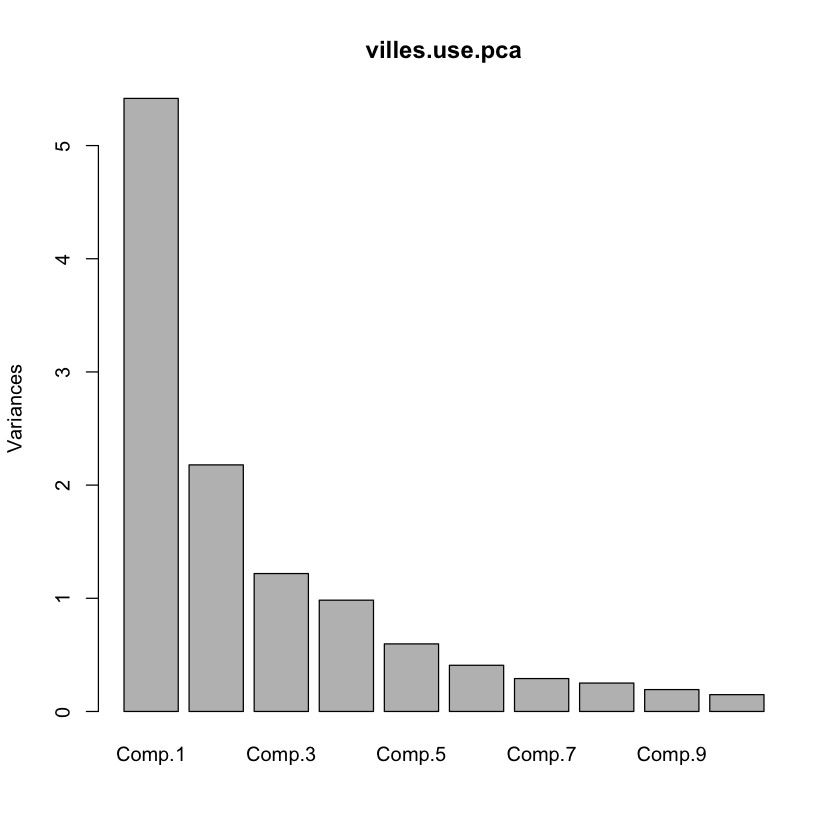

In [17]:
plot(villes.use.pca)

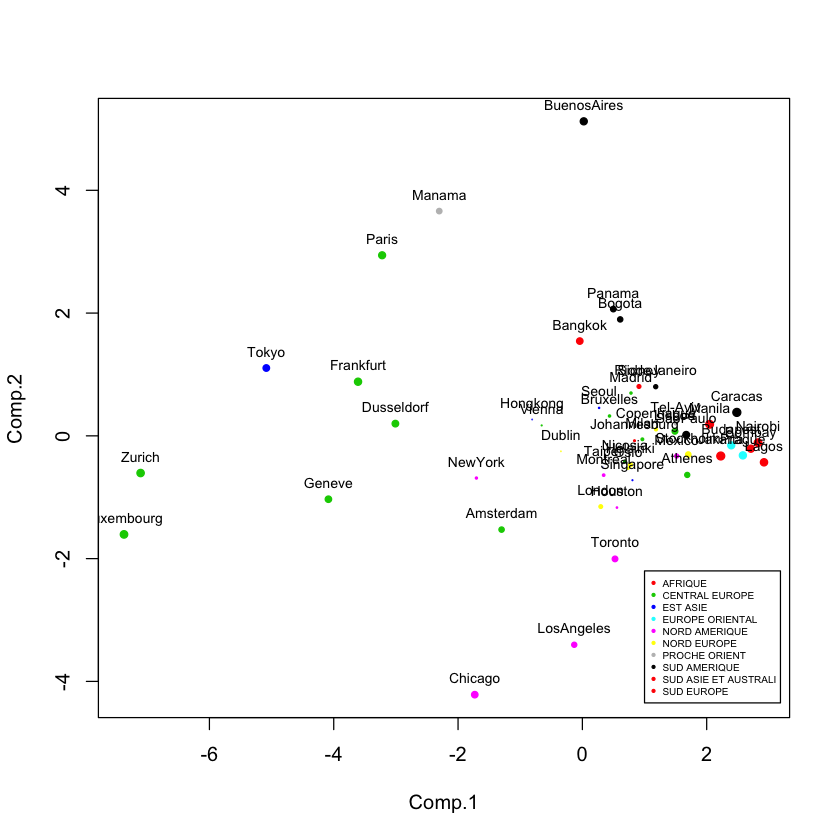

In [18]:
plot(villes.use.pca$scores[,1:2], pch = 20, cex = rowSums(villes.use.pca.ctr.rel[,1:2]) * 1.5,
     col = as.numeric(villes.use[, "Región.del.mundo"]) + 1)
text(villes.use.pca$scores[,1:2], cex = 0.7, pos = 3,
     labels = sub("94", "", villes.use[,"Ciudad"]))
legend(1,-2.2,levels(villes.use[, "Región.del.mundo"]), pch=20,cex=0.5, col=2:nlevels(villes.use[, "Región.del.mundo"]))

In [19]:
villes.use.pca.scores.vars <- t(villes.use.pca$sdev * t(villes.use.pca$loadings))

print(round(villes.use.pca.scores.vars[, 1:2], digits = 2))

                          Comp.1 Comp.2
Maestro                    -0.62  -0.51
Chófer.de.autobús          -0.24  -0.67
Mecánico.de.coche           0.78  -0.29
Obrero.de.la.construcción   0.81  -0.35
Tornero                     0.23  -0.77
Jefe.de.cocina              0.56   0.35
Director.de.fábrica        -0.85   0.22
Ingeniero                  -0.52  -0.01
Cajero.banco               -0.56   0.54
Secretaria.de.dirección     0.71   0.37
Dependienta                 0.87   0.27
Trabajador.textil           0.86   0.00


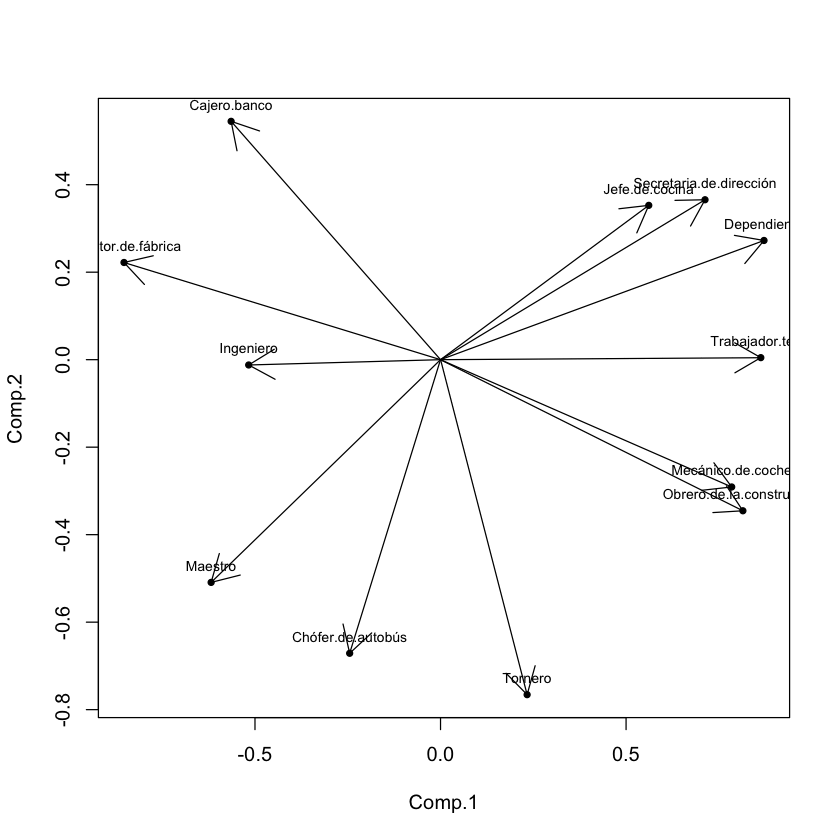

In [20]:
plot(villes.use.pca.scores.vars[, 1:2], pch = 20)
arrows(0, 0, villes.use.pca.scores.vars[, 1], villes.use.pca.scores.vars[, 2])
text(villes.use.pca.scores.vars[, 1:2], cex = 0.7, pos = 3,
     labels = colnames(villes.use[, -c(1, 2)]))